# Task 1

Our partner, a supplement maker, is interested in helping people optimise their vitamin D - what could you tell them from the data to help them go to market with their product? Please show us how you arrived at this insight.

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

from thriva.clean_data import load_clean_data
from thriva.plots import kde_plot, plot_categorical_percentages, plot_hist_percentages

/home/rgd/git/Applied_data_scientist_take-home


In [2]:
vitamin_d = load_clean_data()
vitamin_d.head()

,Active Days Walking,Tests Completed Month,Diet Rating,Exercise Rating,Inactive Time,BMI,Fatigued Rating,Sleep Hours,Stressed Rating,Main Goal,Age,Sex,Vitamin D Supplement,Vitamin D Level
0,0.0,2022-07-01,7.0,0.0,7.5 - 9,25.0,2.0,6 - 8,A little,energy,52,F,Yes,106.0
1,0.0,2022-11-01,7.0,0.0,> 10.5,21.0,5.0,6 - 8,yes,NaN,35,F,Yes,110.0
2,0.0,2022-07-01,10.0,0.0,7.5 - 9,22.0,3.0,6 - 8,None,energy,36,F,No,51.0
3,0.0,2022-12-01,7.0,0.0,< 7.5,24.0,5.0,6 - 8,A little,energy,28,F,No,28.0
4,0.0,2022-06-01,8.0,0.0,> 10.5,39.0,4.0,8 - 10,yes,longevity,52,F,No,46.0


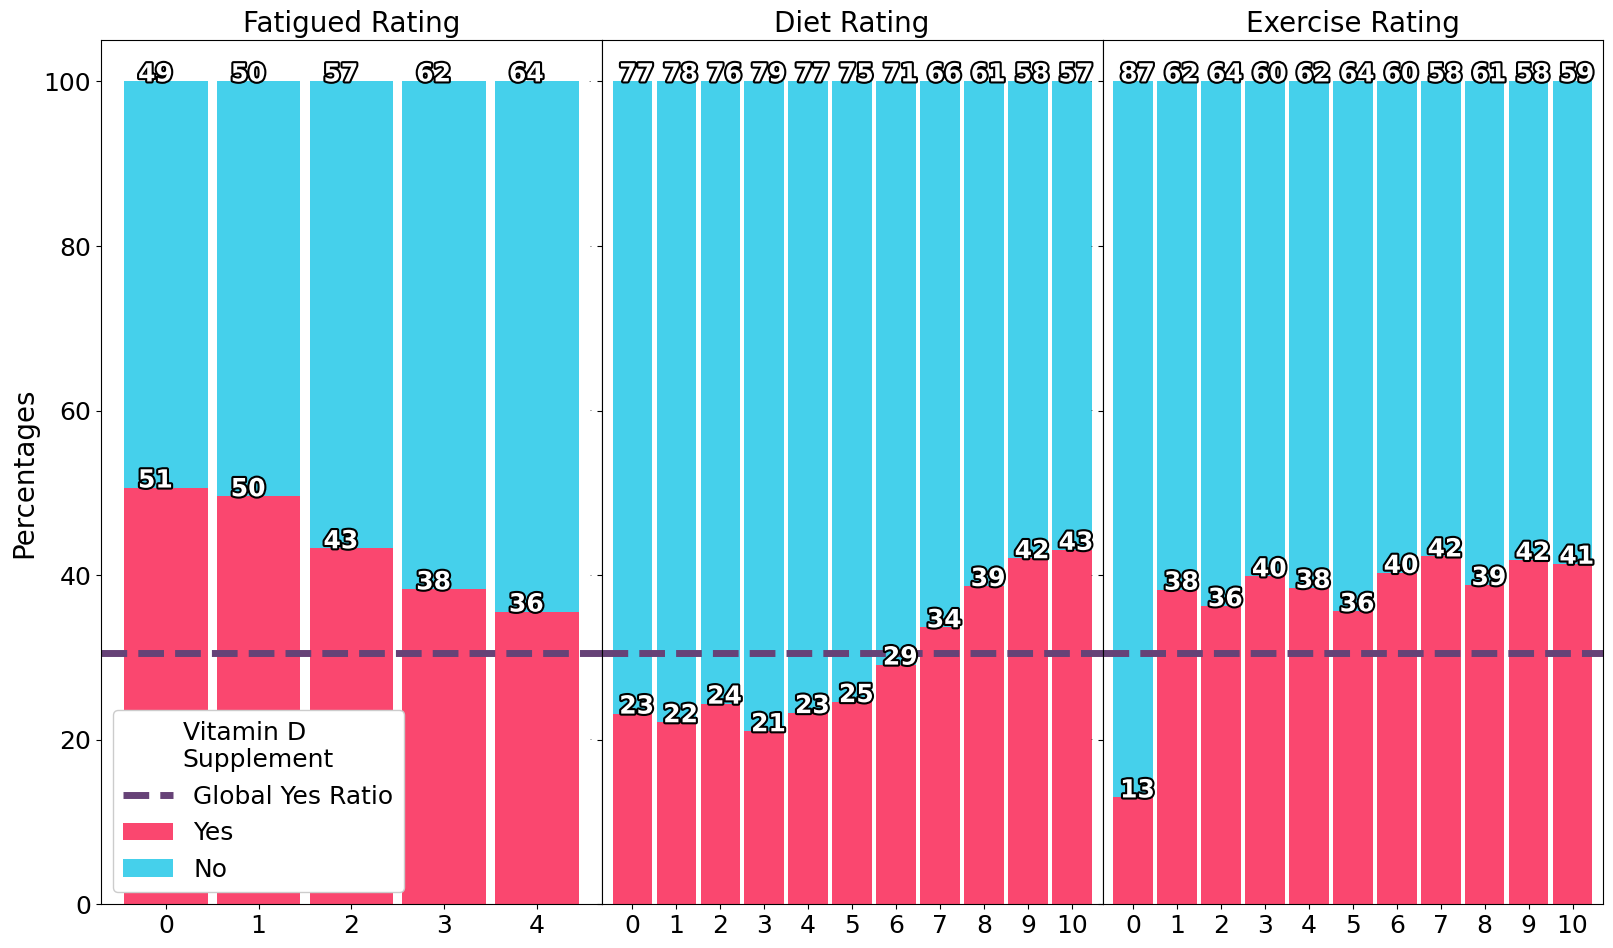

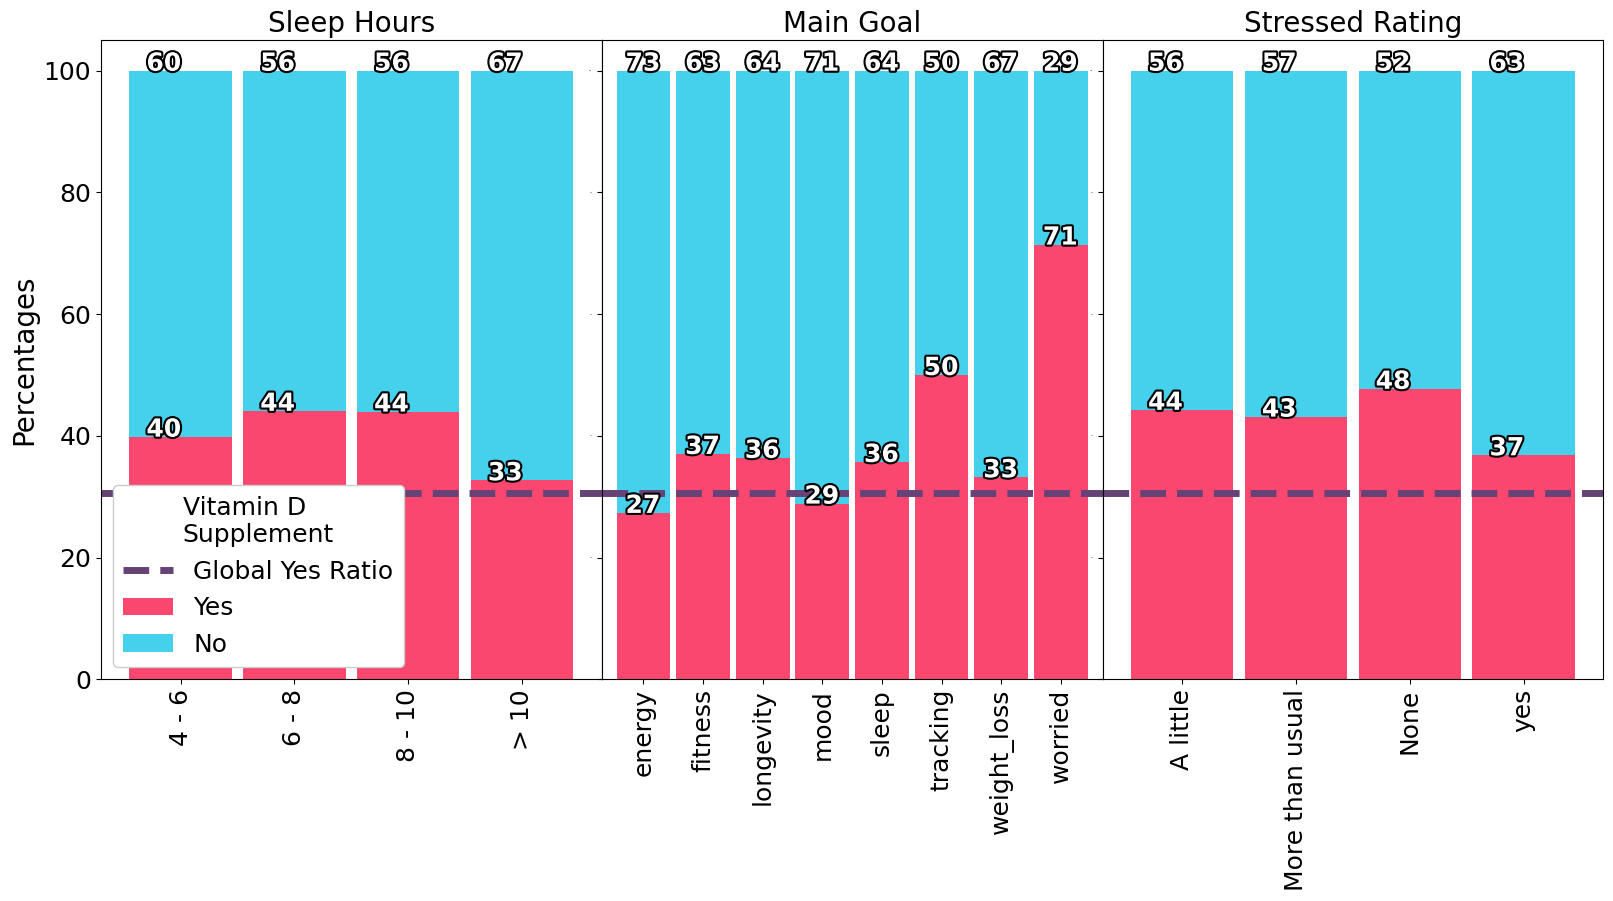

In [3]:
# Investigate who is taking vitamin D supplements
target = "Vitamin D Supplement"
findings_cols_0 = ["Fatigued Rating", "Diet Rating", "Exercise Rating"]
findings_cols_1 = ["Sleep Hours", "Main Goal", "Stressed Rating"]
fig = plot_categorical_percentages(vitamin_d, findings_cols_0, target, bottom=0.0)
plt.savefig("reports/categorical_0.png", dpi=300)
plt.show()
fig = plot_categorical_percentages(vitamin_d, findings_cols_1, target, bottom=0.25)
plt.savefig("reports/categorical_1.png", dpi=300)
plt.show()

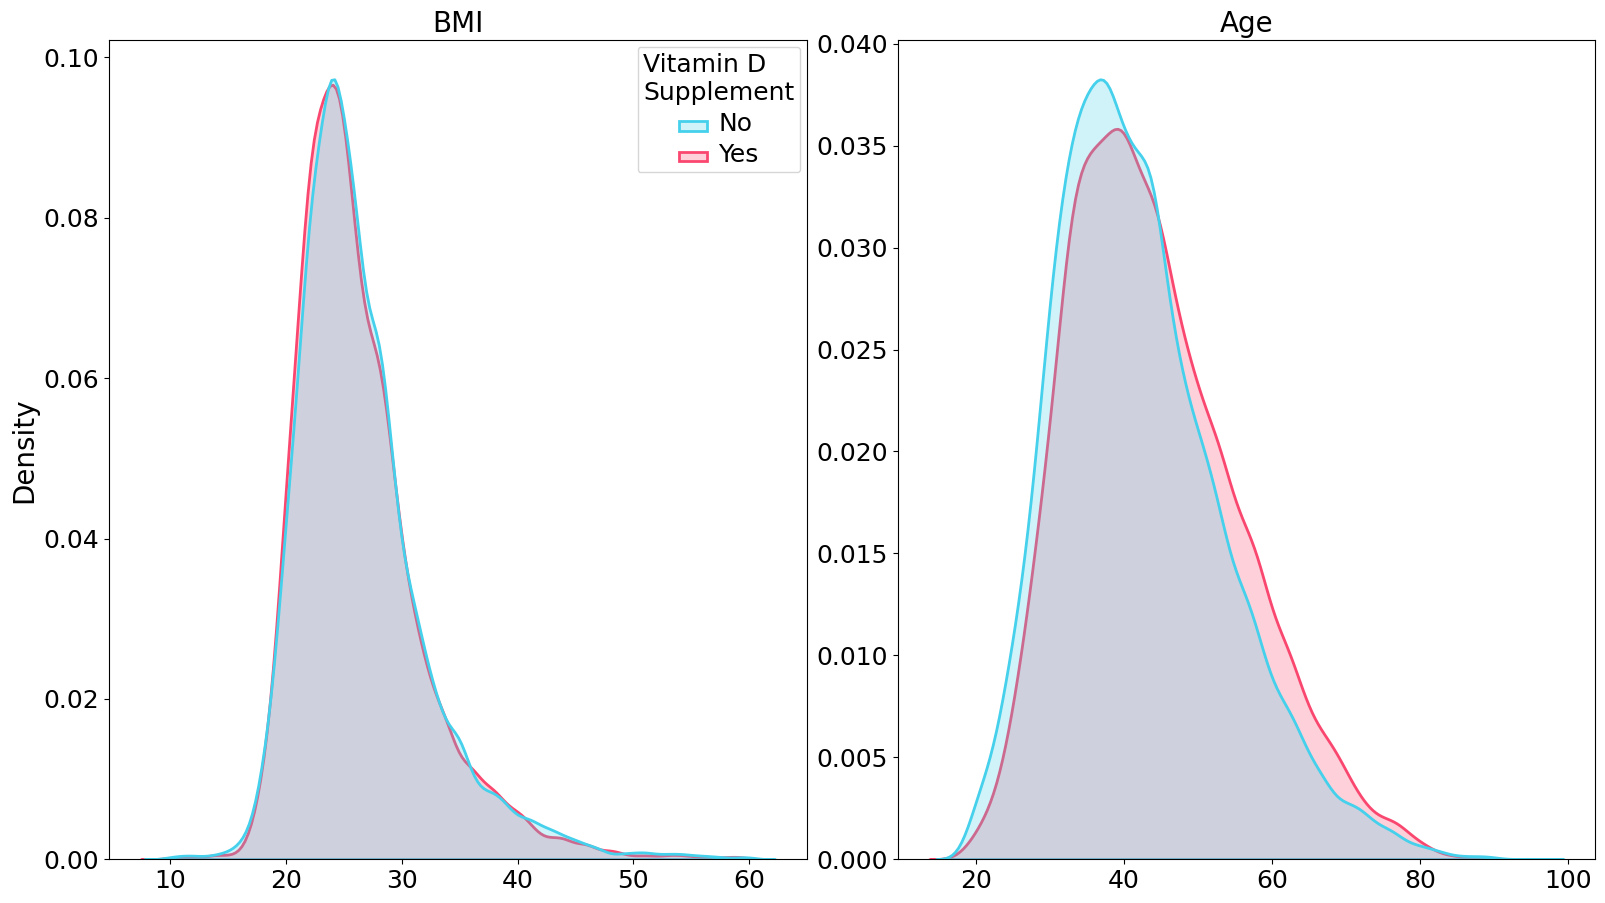

In [4]:
numeric_cols = ["BMI", "Age"]
kde_plot(vitamin_d, numeric_cols, "Vitamin D Supplement")
plt.savefig("reports/numerical_0.png", dpi=300)
plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


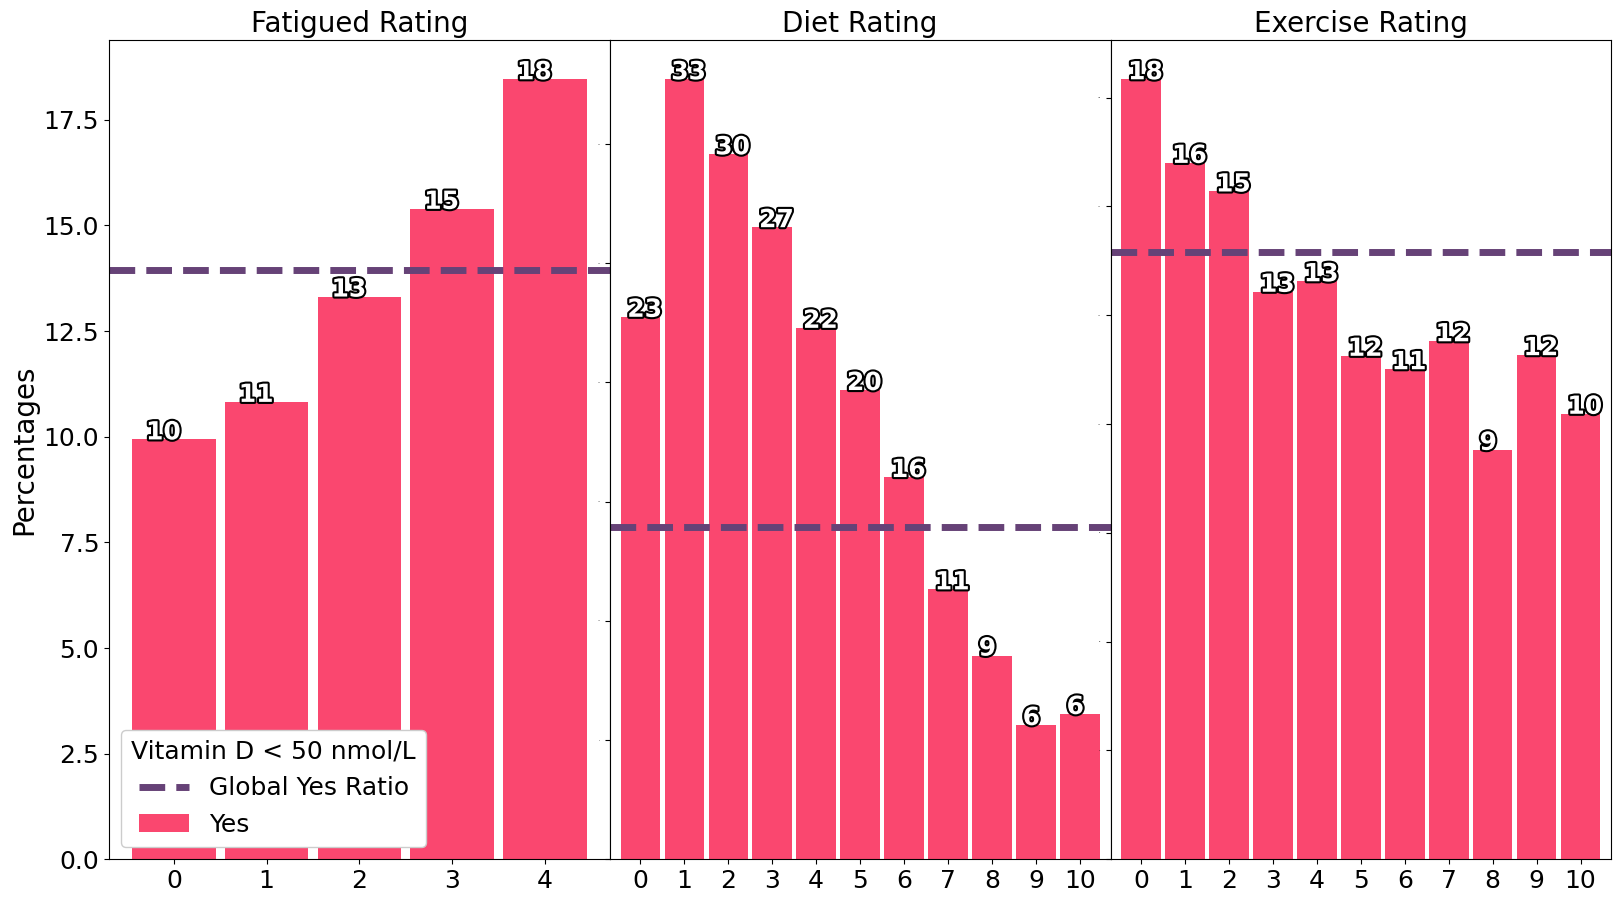

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


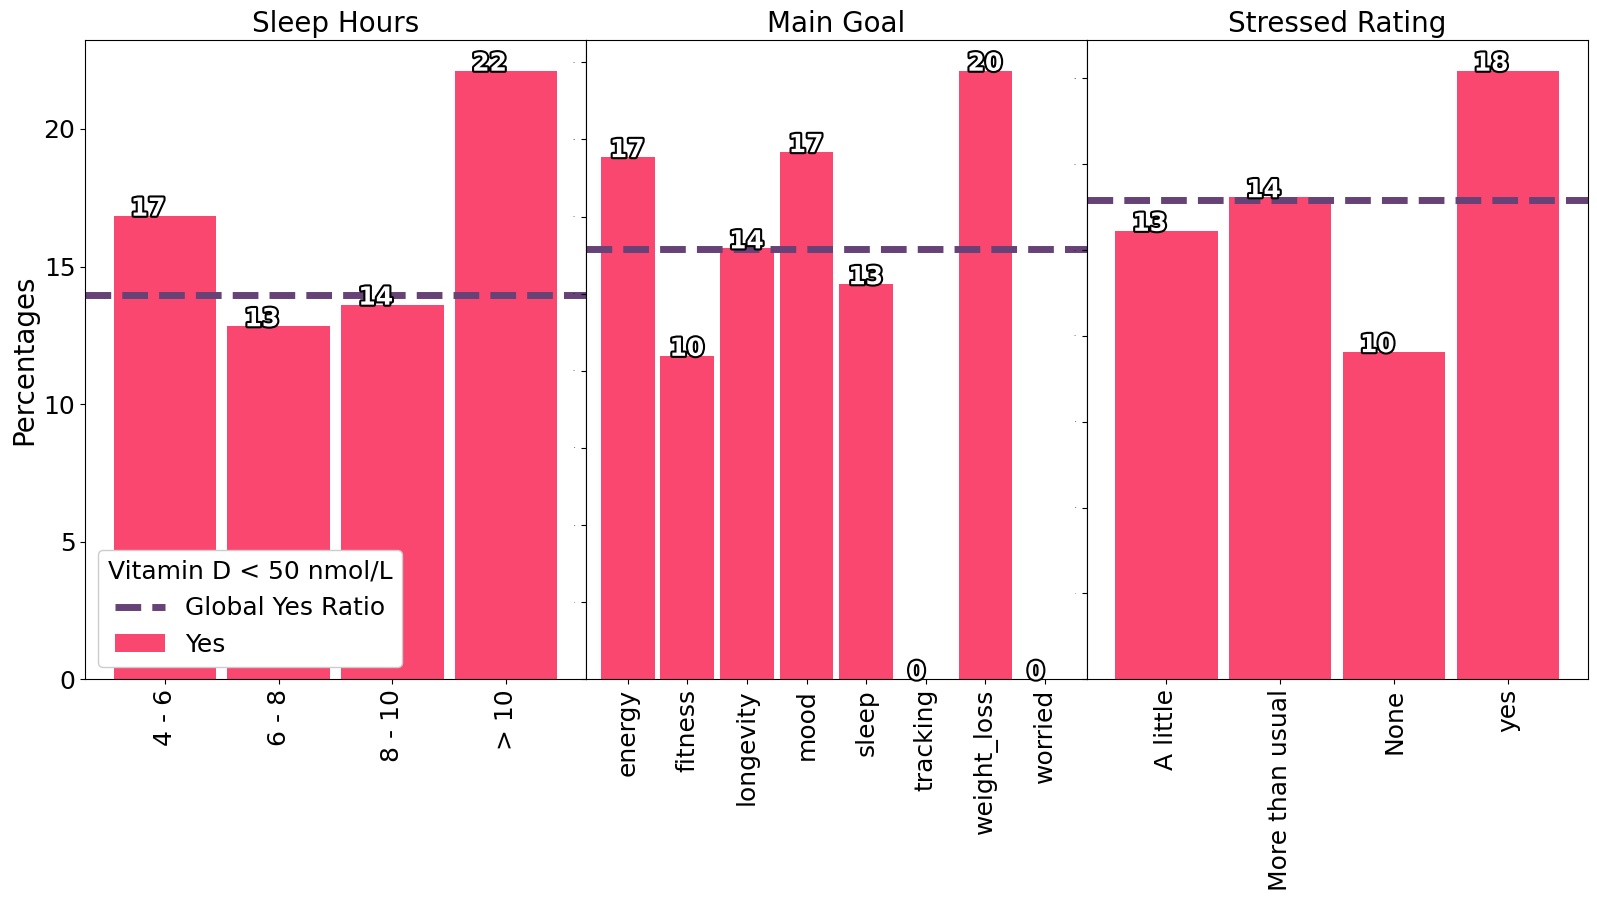

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


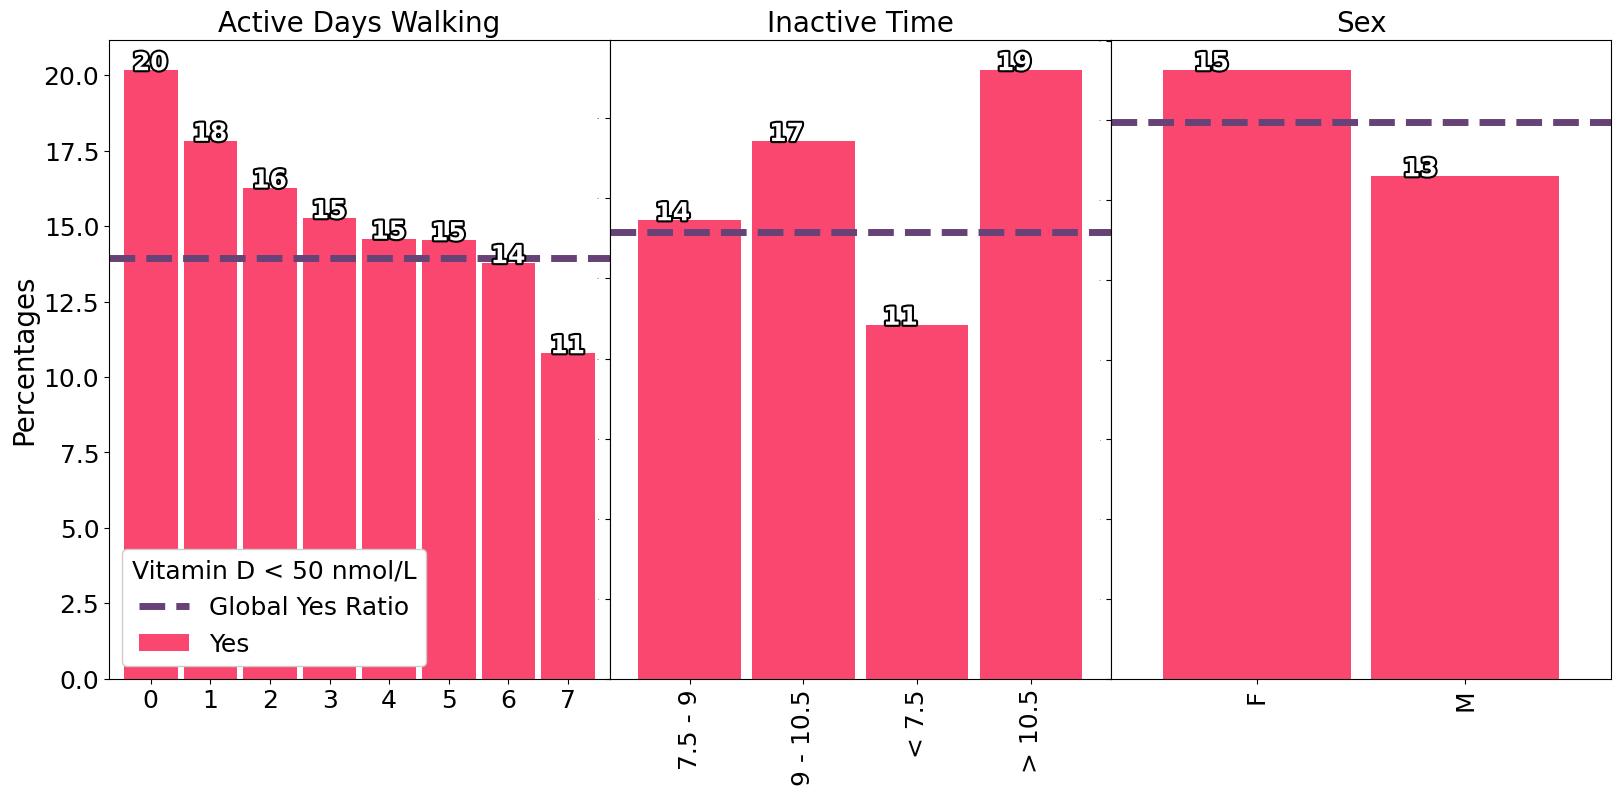

In [5]:
target = "Low Vitamin D"
vitamin_d["Low Vitamin D"] = vitamin_d["Vitamin D Level"] < 50
vitamin_d["Low Vitamin D"] = vitamin_d["Low Vitamin D"].map({True: "Yes", False: "No"})
vitamin_d["Low Vitamin D"] = vitamin_d["Low Vitamin D"].astype("category")
expore_cols_0 = ["Fatigued Rating", "Diet Rating", "Exercise Rating"]
expore_cols_1 = ["Sleep Hours", "Main Goal", "Stressed Rating"]
expore_cols_2 = ["Active Days Walking", "Inactive Time", "Sex"]
fig = plot_hist_percentages(vitamin_d, expore_cols_0, target, bottom=0.05)
plt.savefig("reports/hist_0_low.png", dpi=300)
plt.show()
fig = plot_hist_percentages(vitamin_d, expore_cols_1, target, bottom=0.25)
plt.savefig("reports/hist_1_low.png", dpi=300)
plt.show()
fig = plot_hist_percentages(vitamin_d, expore_cols_2, target, bottom=0.25)
plt.savefig("reports/hist_2_low.png", dpi=300)
plt.show()

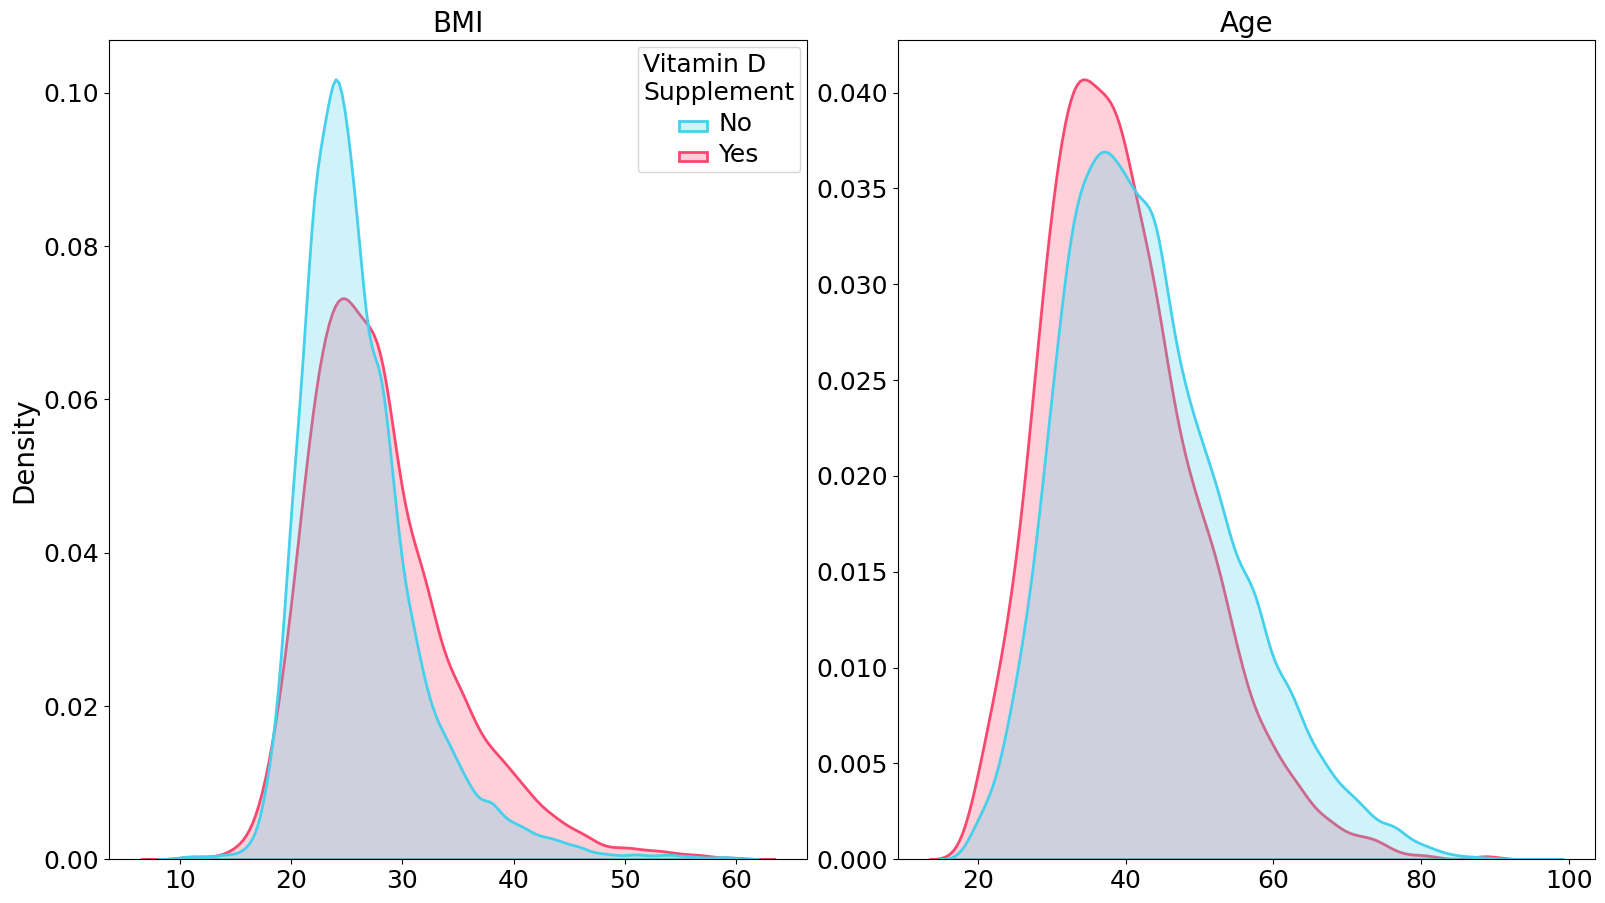

In [6]:
target = "Low Vitamin D"
numeric_cols = ["BMI", "Age"]
kde_plot(vitamin_d, numeric_cols, target)
plt.savefig("reports/numerical_0_low.png", dpi=300)
plt.show()

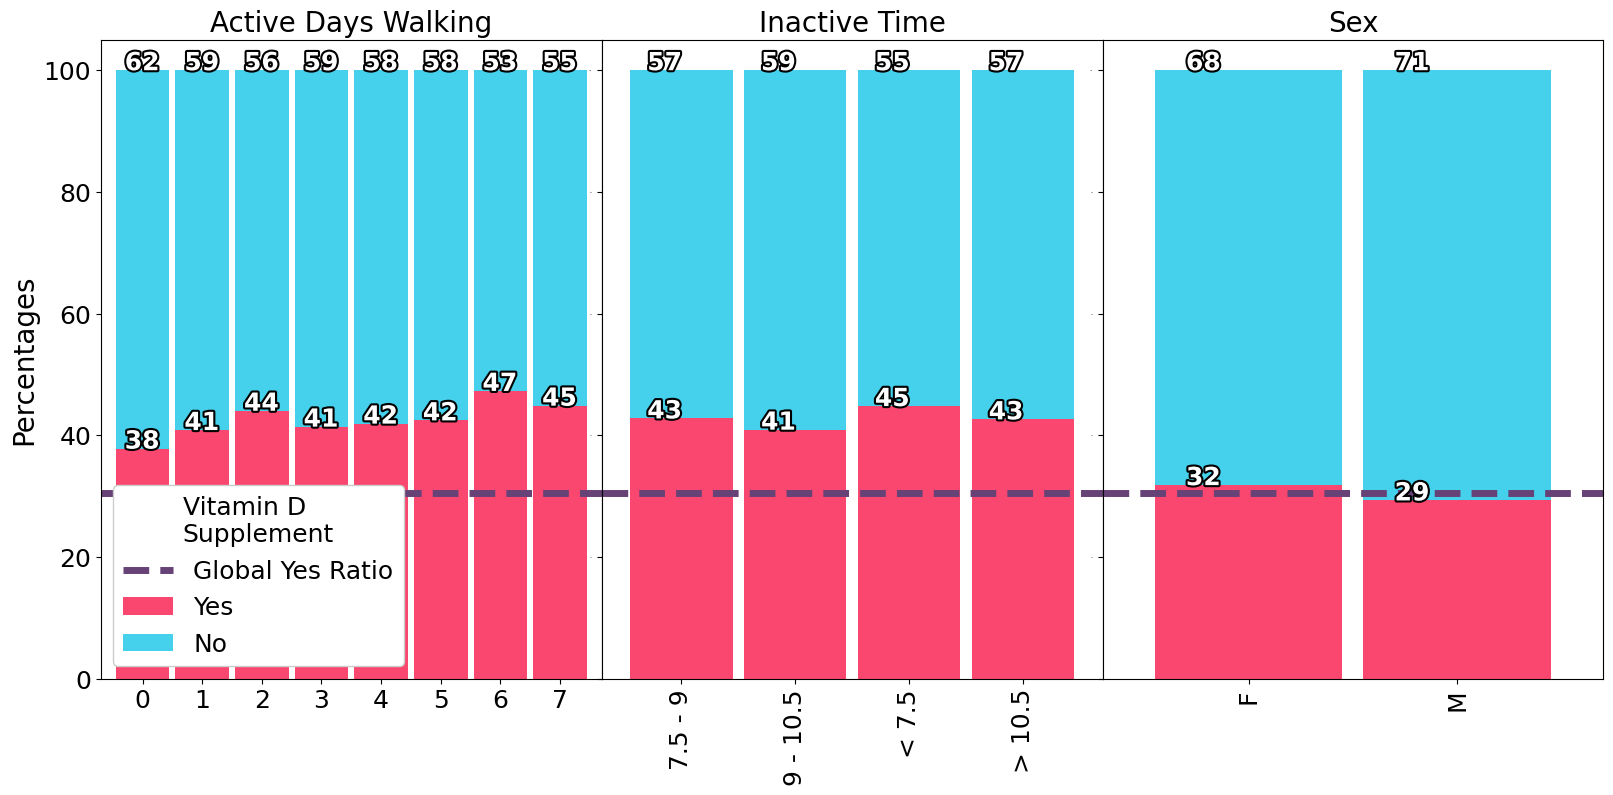

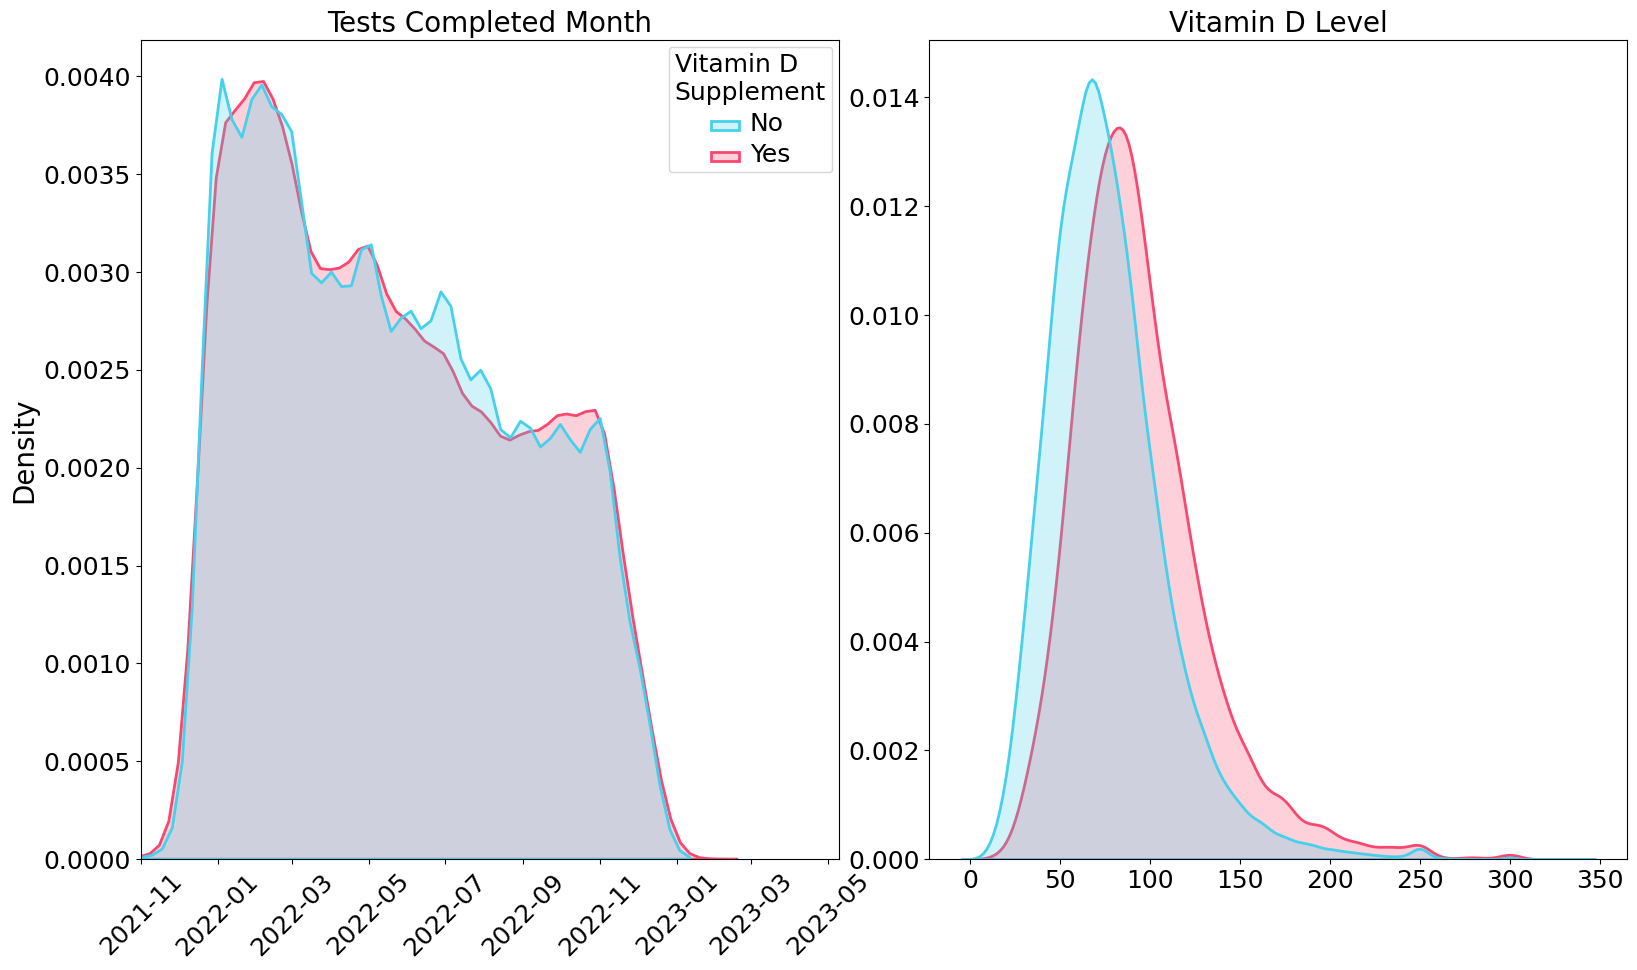

In [7]:
target = "Vitamin D Supplement"
cat_also_look_at = ["Active Days Walking", "Inactive Time", "Sex"]
fig = plot_categorical_percentages(vitamin_d, cat_also_look_at, target, bottom=0.25)
plt.savefig("reports/categorical_2.png", dpi=300)
plt.show()
num_also_look_at = ["Tests Completed Month", "Vitamin D Level"]
kde_plot(vitamin_d, num_also_look_at, target)
plt.savefig("reports/numerical_1.png", dpi=300)
plt.show()